In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g40a9WLtFDsfVJZ6r44G_3BiWh_2IS-Xc9L8m2-RF5iD0-7EP53O6U


#Carregando os Dados

### Importe das bibliotecas utilizadas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Modulo 2/Base Modulo 2.xlsx')
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


### Dicionário de dados.

1 - ID : ID do cliente

2 - age: Número

3 - job : tipo de emprego (categórico: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")

4 - marital : estado civil (categórico: "divorced", "married", "single", "divorced")

5 - education (categórica: "primary", "secondary", "tertiary, "unknown")

6 - default: se o crédito está inadimplente ou não (categórica: "no", "yes")

7 - balance: tem dinheiro na conta (numérico)

8 - housing: se possui casa (categorical: "no", "yes")

9 - loan: se tem crédito à habitação (categórica: "no", "yes")

10 - contact: tipo de comunicação do contato (categórico: "cellular", "telephone", "unknown")

11 - month: último mês de contato do ano (categórico: "jan", ..., "dec")

12 - day: último dia da semana de contato (categórico: "mon", "tue", "wed", "thu", "fri")

13 - duration: duração do último contato, em segundos (numérico)

14 - campaign: número de contatos realizados durante a campanha (numérico)

15 - pdays: número de dias que passaram depois que o cliente foi contatado pela última vez em uma campanha anterior (numérico; -1 significa que o cliente não foi contatado anteriormente)

16 - previous: número de contatos realizados antes desta campanha para os cliente (numérico)

17 - poutcome: resultado da campanha de marketing anterior (categórica: "failure", "unknown", "other", "success")

### Visão geral dos dados

In [ ]:
data.shape

(31647, 18)

- Podemos perceber que existe **18 variáveis e 31647 observações** dentro da base.

In [ ]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

- Variáveis presentes na base.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


- Informações sobre cada variável, a quantidade de não nulos presente, e o tipo. Como não há variáveis faltantes, não tem a necessidade de fazer uma "Engenharia dos dados" para solucionar tal problema.

In [ ]:
data.duplicated().sum()

0

- Verificando se há registros duplicados na base.

# Análise exploratória dos dados
Criação das plotagens para a analise das variaveis para iniciar o entendimento de como as variáveis podem se relacionar.


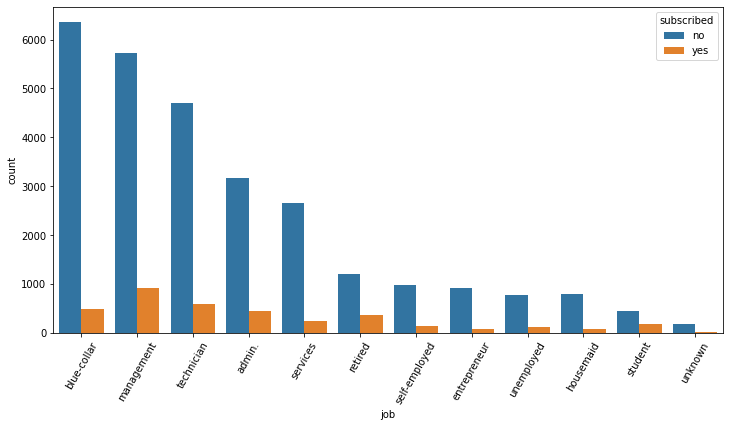

In [ ]:
order = ['blue-collar', 'management', 'technician', 'admin.', 'services', 'retired', 'self-employed', 
         'entrepreneur', 'unemployed', 'housemaid', 'student', 'unknown']

plt.figure(figsize=(12, 6))
sns.countplot(x="job", hue="subscribed", data=data, order = order)
plt.xticks(rotation=60)
plt.show()

- Correlação dos trabalhos apresentados na base com quem aceitou ou não um depósito .

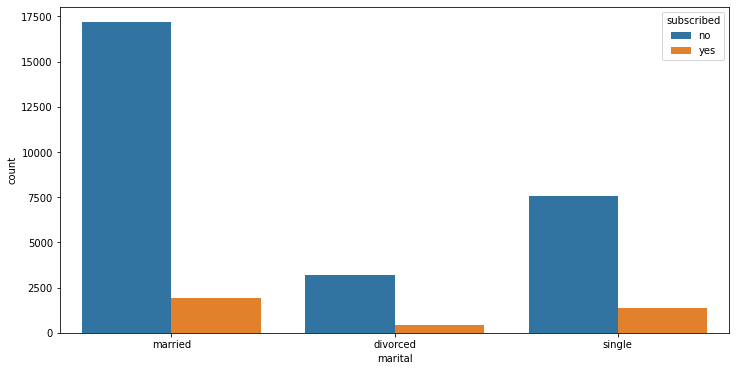

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="marital", hue="subscribed", data=data)
plt.xticks(rotation=0)
plt.show()

- Correlação do estado civil com quem aceitou ou não um depósito. 

- Podemos notar que para quem é casado ('married') tem uma quantidade de aceitação do deposito em relação aos outros estado civil.

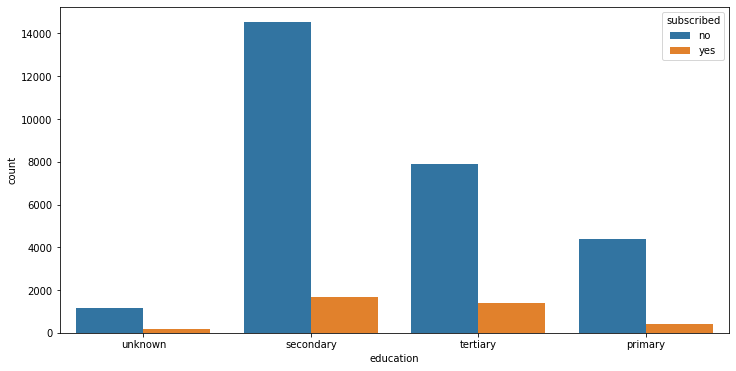

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="education", hue="subscribed", data=data)
plt.xticks(rotation=0)
plt.show()

- Correlação da educação com quem aceitou ou não um depósito. 

- É visível também que para quem a educação em secondary e tertiary terá uma porcentagem maior de aceitação do deposito do que olhando para os outros estados da educação.

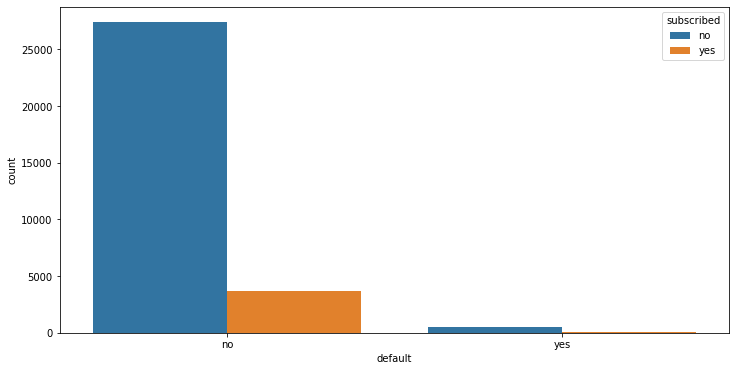

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="default", hue="subscribed", data=data)
plt.xticks(rotation=0)
plt.show()

- Correlação do crédito que está inadimplente ou não com quem aceitou ou não um depósito. 

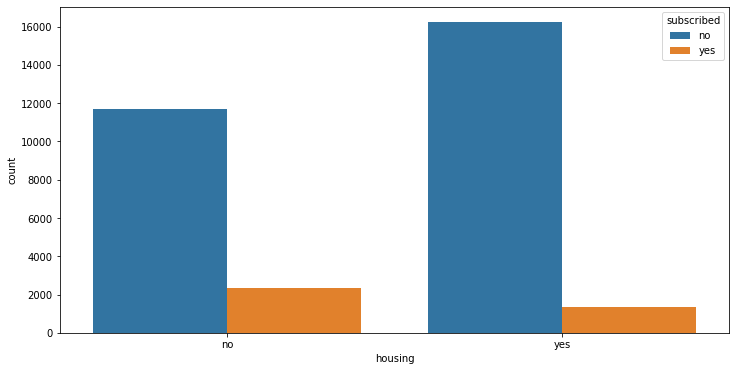

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="housing", hue="subscribed", data=data)
plt.xticks(rotation=0)
plt.show()

- Correlação de quem já possui casa com quem aceitou ou não um depósito.

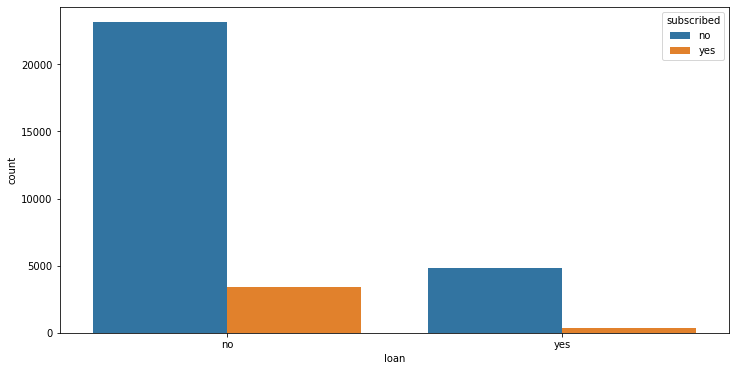

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="loan", hue="subscribed", data=data)
plt.xticks(rotation=0)
plt.show()

- Correlação de quem possui crédito com quem aceitou ou não um depósito.

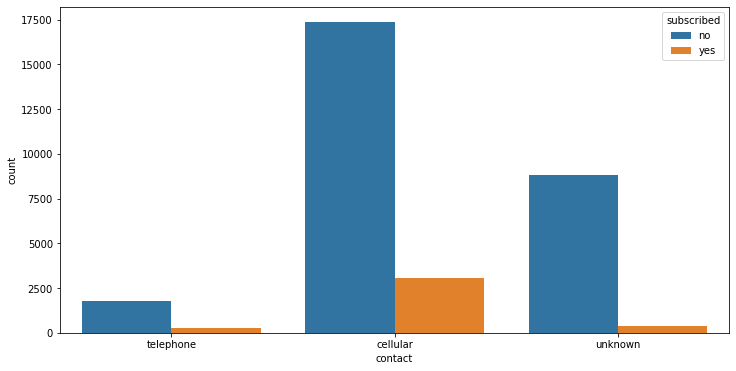

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="contact", hue="subscribed", data=data)
plt.xticks(rotation=0)
plt.show()

- Correlação do tipo de contato com quem aceitou ou não um depósito.
 
- Uma percepção que pode ser vista é a quantidade valores que estão atrelados aos desconhecidos (unknown) tendo em vista que esses valores podem dar muita relevância se tivessem sido registrada corretamente para o telephone quanto para o celluar.

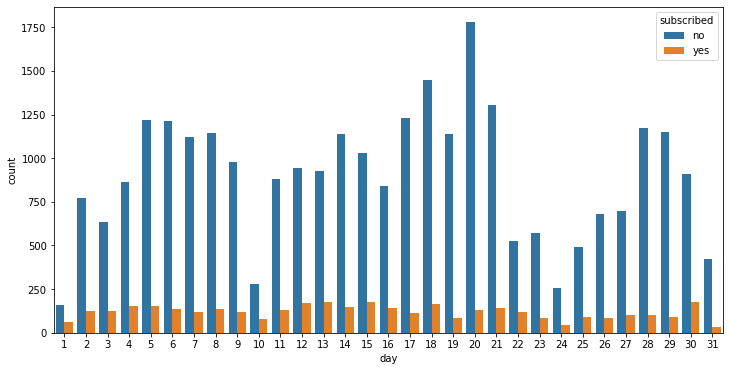

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="day", hue="subscribed", data=data)
plt.xticks(rotation=0)
plt.show()

- Correlação dos dias com quem aceitou ou não um depósito.
 
- A relação pode ser vinculada com a média móvel, assim uma previsão/dedução de o que pode acontecer não pode ser bem assertiva.

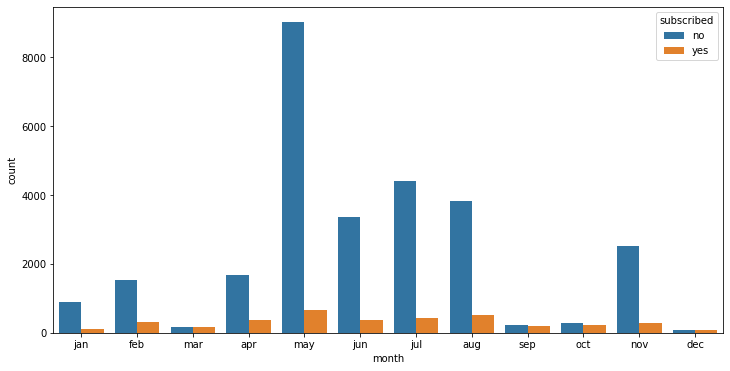

In [ ]:
order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.figure(figsize=(12, 6))
sns.countplot(x="month", hue="subscribed", data=data, order=order)
plt.xticks(rotation=0)
plt.show()

- Correlação dos meses com quem aceitou ou não um depósito.
 
- Para o mês de may, jun, jul onde teve um valor maior de depósito, pode ser explicado com a possível chegada do verão no EUA, onde as pessoas/família podem querer adiquirir esse empréstimo para viagens por exemplo.

# Tratando variáveis

- Como visto pelos histogramas, na variável contato, há uma presença relevante na quantidade de desconhecidos, fazendo com que a análise de quem recebe ou não o depósito pode ser afetada.
 
- Também esse ajuste pode ser feito para o job que tem um número considerável de pessoas não conhecidas.


### Tratamento das variáveis da coluna 'contact'
O tratamento para essa coluna foi produzida no excel, pois a falta de habilidade com python, gerou uma limitação para o tratamento dessa variável.
 
Para que fosse possível esse tratamento, a seguinte linha de raciocínio foi utilizada.
 
1 - Foi analisado a quantidade de quem fez o financiamento ou não em relação aos contatos desconhecidos (unknown);


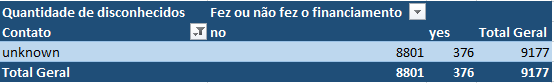


 
2 - Segundo passo foi feita uma análise do percentual com o total de colunas para quem fez o financiamento ou não para os contatos restantes (celluar, telephone);

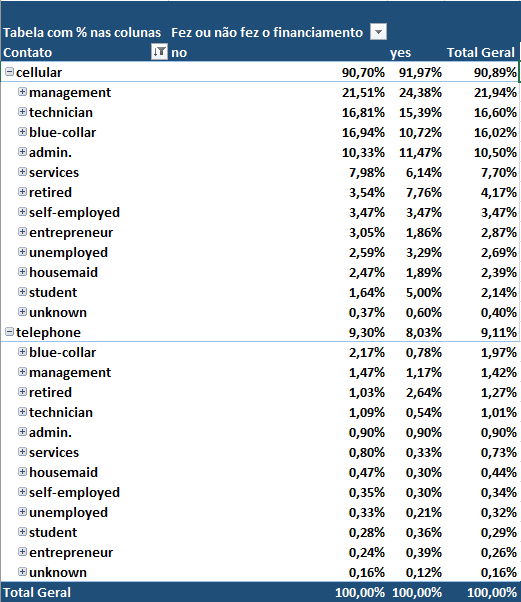



 3 - Com os valores da quantidade encontrado no item 1, é feita a multiplicação com as porcentagens encontradas no item 2 onde iremos ter os valores das quantidades de desconhecidos que serão 'encaixados' dentro das variáveis cellular e telephone.
 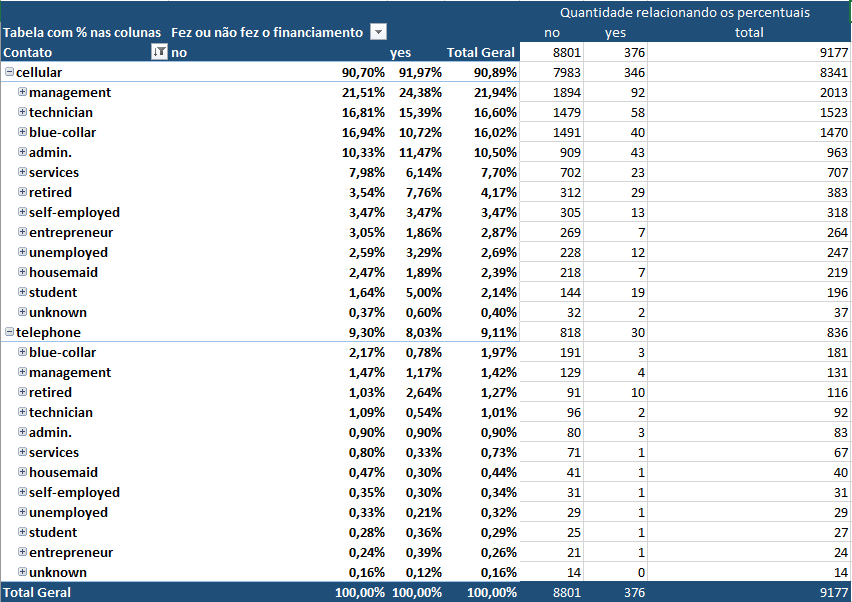

- OBS.: Como podemos perceber, em algumas linhas a soma da quantidade em relação aos percentuais não é exata com o valor mostrado na coluna dos totais. Isso pode ser explicado pois de acordo com as variáveis utilizadas para explicar a quantidade/porcentagem de como os desconhecidos serão distribuídos. Nesse caso foi utilizado o marital, education, default, housing, loan. Com isso, para que os valores em quantidade possam coincidir com o resultado final mostrado, a duplicação de registros ou a exclusão foi feitas (bootstrap dos dados). 

- Após o tratamento descrito acima, foi gerado um arquivo de excel que será utilizado para concatenar com a base original logo após feita a exclusão dos registros em que o contato é desconhecido.

In [ ]:
data_contact = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Modulo 2/BD_cellular_telephone.xlsx')
data_contact.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,480,39,management,single,secondary,no,18.77,yes,no,telephone,6,may,185,1,-1,0,unknown,no
1,3260,43,blue-collar,married,secondary,no,9.60,yes,no,telephone,15,may,436,1,-1,0,unknown,no
2,9701,41,services,single,secondary,no,2.60,no,no,telephone,6,jun,75,1,-1,0,unknown,no
3,2843,53,technician,married,secondary,no,7.19,yes,no,telephone,14,may,230,1,-1,0,unknown,no
4,4554,60,management,married,tertiary,no,3.28,yes,no,telephone,20,may,72,5,-1,0,unknown,no


In [ ]:
data_contact['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

- Verificação se na tabela importada há presença de registros desconhecidos (unknown) na coluna 'contact'. 

In [ ]:
data_limpesa = data

- Para fazermos a limpeza dos desconhecidos na coluna contact, foi criado uma base auxiliar para que não ocorra nenhuma modificação na base original.

In [ ]:
remover = data_limpesa.loc[data_limpesa['contact'] == 'unknown']

data_limpesa = data_limpesa.drop(remover.index)
data_limpesa['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

- Fazendo a procura dos dados desconhecidos na coluna 'contact' e salvando em uma variável e depois retirando os dados.

In [ ]:
data = pd.concat([data_limpesa, data_contact])
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933.0,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3.0,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891.0,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287.0,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119.0,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


- Por fim, fazendo a concatenação das tabelas.

In [ ]:
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [ ]:
data.shape

(31652, 18)

- Verificando se após a concatenação das tabelas, ainda há registros desconhecidos na coluna 'contact'.

### Tratamento das variáveis da coluna 'job'
Para o tratamento dos registros desconhecidos na coluna 'job', foram distribuídos os registros para o tipo de trabalho com maior média.

In [ ]:
data['job'].value_counts().sort_index()

admin.           3631
blue-collar      6842
entrepreneur     1008
housemaid         874
management       6639
retired          1576
self-employed    1125
services         2903
student           636
technician       5307
unemployed        905
unknown           206
Name: job, dtype: int64

- Vendo a contagem dos trabalhos presentes na base.

In [ ]:
data['job'].value_counts().sort_values(ascending=False) / len(data['job']*100)

blue-collar      0.216163
management       0.209750
technician       0.167667
admin.           0.114716
services         0.091716
retired          0.049791
self-employed    0.035543
entrepreneur     0.031846
unemployed       0.028592
housemaid        0.027613
student          0.020094
unknown          0.006508
Name: job, dtype: float64

- Calculando a média da quantidade dos trabalhos e ordenando.
 
- Assim, como a 'job' de maior média foi o 'blue-collar', a distribuição de todos os registros desconhecidos 'unknown' foram para esse tipo de trabalho.


In [ ]:
data['job'].replace(["unknown"], data['job'].mode(), inplace = True)
data['job'].unique()

array(['admin.', 'blue-collar', 'services', 'management', 'technician',
       'retired', 'housemaid', 'student', 'self-employed', 'entrepreneur',
       'unemployed'], dtype=object)

- Fazendo a localização dos registros desconhecidos da coluna job e alterando para o tipo de trabalho 'blue-collar'.

# Iniciando o treinamento

Após fazer todo o trabalho manipulando, acertando e tirando informações dos dados, agora a ideia é criar um modelo que consiga prever a partir de um novo registro, possa nos mostrar se ele é suscetível ou não a ganhar um empréstimo.

- Para isso, algumas variáveis não serão necessárias para a criação do modelo, tais como o ID, day, month.

In [ ]:
data_treino = data
data_treino.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933.0,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,blue-collar,married,secondary,no,3.0,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891.0,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287.0,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119.0,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


- Criando a base que servirá para a criação do modelo.

In [ ]:
data_treino.drop(columns = ['ID', 'day', 'month'], inplace=True)
data_treino.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933.0,no,no,telephone,44,2,-1,0,unknown,no
1,31,blue-collar,married,secondary,no,3.0,no,no,cellular,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891.0,yes,no,cellular,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287.0,no,no,cellular,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119.0,yes,no,cellular,380,1,-1,0,unknown,no


- Fazendo a retirada das colunas que não serão úteis para gerar o modelo.

In [ ]:
 from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse = False)
data_transform = pd.DataFrame(ohe.fit_transform(data_treino["job"].to_frame()), columns = "job_" + np.sort(data_treino["job"].unique()))
data_transform.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- Com a utilização da biblioteca OneHotEncoder para codificar recursos categóricos como uma matriz numérica. Assim foi criado uma tabela com todos os job agora transformados em variáveis booleanas.

In [ ]:
data_treino.drop(columns = ["job"], inplace = True)
data_treino.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,married,unknown,no,1933.0,no,no,telephone,44,2,-1,0,unknown,no
1,31,married,secondary,no,3.0,no,no,cellular,91,2,-1,0,unknown,no
2,27,married,secondary,no,891.0,yes,no,cellular,240,1,-1,0,unknown,no
3,57,divorced,tertiary,no,3287.0,no,no,cellular,867,1,84,3,success,yes
4,31,married,secondary,no,119.0,yes,no,cellular,380,1,-1,0,unknown,no


- Removendo a coluna job para inserir os valores da nova tabela criada pelo OneHotEncoder.

In [ ]:
data_treino['job_admin.'] = data_transform['job_admin.']
data_treino['job_blue-collar'] = data_transform['job_blue-collar']
data_treino['job_entrepreneur'] = data_transform['job_entrepreneur']
data_treino['job_housemaid'] = data_transform['job_housemaid']
data_treino['job_management'] = data_transform['job_management']
data_treino['job_retired'] = data_transform['job_retired']
data_treino['job_self-employed'] = data_transform['job_self-employed']
data_treino['job_services'] = data_transform['job_services']
data_treino['job_student'] = data_transform['job_student']
data_treino['job_technician'] = data_transform['job_technician']
data_treino['job_unemployed'] = data_transform['job_unemployed']

# data_treino = pd.concat([data_treino, data_transform], axis = 1)

- fazendo a inserção dos valores da tabela data_transform para a tabela data_treino. Obs.: A opção do pd.concat() não deu muito certo, pois isso foi feita a inserção na força bruta.

In [ ]:
data_treino.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,married,unknown,no,1933.0,no,no,telephone,44,2,-1,0,unknown,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31,married,secondary,no,3.0,no,no,cellular,91,2,-1,0,unknown,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,married,secondary,no,891.0,yes,no,cellular,240,1,-1,0,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,57,divorced,tertiary,no,3287.0,no,no,cellular,867,1,84,3,success,yes,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31,married,secondary,no,119.0,yes,no,cellular,380,1,-1,0,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- Nova tabela agora com os valores gerados pelo OneHotEncoder.

In [ ]:
data_transform = pd.DataFrame(ohe.fit_transform(data_treino["marital"].to_frame()), columns = "marital_" + np.sort(data_treino["marital"].unique()))
data_transform.head()

,marital_divorced,marital_married,marital_single
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [ ]:
data_treino.drop(columns = ["marital"], inplace = True)

data_treino['marital_divorced'] = data_transform['marital_divorced']
data_treino['marital_married'] = data_transform['marital_married']
data_treino['marital_single'] = data_transform['marital_single']

data_treino.head()

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single
0,56,3,0,0.029001,0,0,1,44,2,999,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,31,1,0,0.000045,0,0,0,91,2,999,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,27,1,0,0.013368,1,0,0,240,1,999,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,57,2,0,0.049315,0,0,0,867,1,84,3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,31,1,0,0.001785,1,0,0,380,1,999,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
data_treino.loc[(data_treino.education == 'unknown'), 'education'] = 3
data_treino.loc[(data_treino.education == 'tertiary'), 'education'] = 2
data_treino.loc[(data_treino.education == 'secondary'), 'education'] = 1
data_treino.loc[(data_treino.education == 'primary'), 'education'] = 0

- Fazendo a mesma troca das variáveis categóricas para a educação e transformando em numérica com uma determinada ordem de primary ate unknown.

In [ ]:
data_treino.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,married,3,no,1933.0,no,no,telephone,44,2,-1,0,unknown,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31,married,1,no,3.0,no,no,cellular,91,2,-1,0,unknown,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,married,1,no,891.0,yes,no,cellular,240,1,-1,0,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,57,divorced,2,no,3287.0,no,no,cellular,867,1,84,3,success,yes,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31,married,1,no,119.0,yes,no,cellular,380,1,-1,0,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_treino.loc[(data_treino.default == 'yes'), 'default'] = 1
data_treino.loc[(data_treino.default == 'no'), 'default'] = 0

- Fazendo também a troca na coluna default da variável categórica para variáveis booleanas.

In [ ]:
data_treino.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,married,3,0,1933.0,no,no,telephone,44,2,-1,0,unknown,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31,married,1,0,3.0,no,no,cellular,91,2,-1,0,unknown,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,married,1,0,891.0,yes,no,cellular,240,1,-1,0,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,57,divorced,2,0,3287.0,no,no,cellular,867,1,84,3,success,yes,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31,married,1,0,119.0,yes,no,cellular,380,1,-1,0,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- A Partir dos exemplos acima, faremos a mesma troca para o housing, loan, contact e para a coluna pdays fazer a troca do -1, pois o modelo não fica adaptado com o valor negativo.

In [ ]:
data_treino.loc[(data_treino.housing == 'yes'), 'housing'] = 1
data_treino.loc[(data_treino.housing == 'no'), 'housing'] = 0

data_treino.loc[(data_treino.loan == 'yes'), 'loan'] = 1
data_treino.loc[(data_treino.loan == 'no'), 'loan'] = 0

data_treino.loc[(data_treino.contact == 'telephone'), 'contact'] = 1
data_treino.loc[(data_treino.contact == 'cellular'), 'contact'] = 0

data_treino.loc[(data_treino.pdays == -1), 'pdays'] = 999

In [ ]:
data_treino.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,married,3,0,1933.0,0,0,1,44,2,999,0,unknown,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31,married,1,0,3.0,0,0,0,91,2,999,0,unknown,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,married,1,0,891.0,1,0,0,240,1,999,0,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,57,divorced,2,0,3287.0,0,0,0,867,1,84,3,success,yes,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31,married,1,0,119.0,1,0,0,380,1,999,0,unknown,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- Base com as alterações citadas acima.

In [ ]:
data_transform = pd.DataFrame(ohe.fit_transform(data_treino["poutcome"].to_frame()),columns = "poutcome_" + np.sort(data_treino["poutcome"].unique()))
data_transform.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0


- Para fazer a transformação das variáveis categóricas da coluna poutcome, foi utilizado novamente o OneHotEncoder para auxiliar na transformação.

In [ ]:
data_treino.drop(columns = ['poutcome'], inplace = True)

data_treino['poutcome_failure'] = data_transform['poutcome_failure']
data_treino['poutcome_other'] = data_transform['poutcome_other']
data_treino['poutcome_success'] = data_transform['poutcome_success']
data_treino['poutcome_unknown'] = data_transform['poutcome_unknown']

In [ ]:
data_treino.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,married,3,0,1933.0,0,0,1,44,2,999,0,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,31,married,1,0,3.0,0,0,0,91,2,999,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,27,married,1,0,891.0,1,0,0,240,1,999,0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,57,divorced,2,0,3287.0,0,0,0,867,1,84,3,yes,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,31,married,1,0,119.0,1,0,0,380,1,999,0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data_treino.loc[(data_treino.subscribed == 'yes'), 'subscribed'] = 1
data_treino.loc[(data_treino.subscribed == 'no'), 'subscribed'] = 0

In [ ]:
data_treino.balance.sort_values()

10365     -8019.0
31298     -6847.0
23749     -4057.0
25273     -3058.0
24105     -2712.0
           ...   
2794      58932.0
7585      66653.0
30188     66721.0
19632     81204.0
28050    102127.0
Name: balance, Length: 31652, dtype: float64

In [ ]:
data_treino.loc[(data_treino.balance > 66653.0), 'balance'] = 66653.0
data_treino['balance'] = data_treino['balance'] / 66653.0

data_treino.balance.sort_values()

10365   -0.120310
31298   -0.102726
23749   -0.060867
25273   -0.045879
24105   -0.040688
           ...   
2794     0.884161
30188    1.000000
7585     1.000000
28050    1.000000
19632    1.000000
Name: balance, Length: 31652, dtype: float64

In [ ]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31652 entries, 0 to 9181
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                31652 non-null  int64  
 1   education          31652 non-null  object 
 2   default            31652 non-null  object 
 3   balance            31652 non-null  float64
 4   housing            31652 non-null  object 
 5   loan               31652 non-null  object 
 6   contact            31652 non-null  object 
 7   duration           31652 non-null  int64  
 8   campaign           31652 non-null  int64  
 9   pdays              31652 non-null  int64  
 10  previous           31652 non-null  int64  
 11  subscribed         31652 non-null  object 
 12  job_admin.         31652 non-null  float64
 13  job_blue-collar    31652 non-null  float64
 14  job_entrepreneur   31652 non-null  float64
 15  job_housemaid      31652 non-null  float64
 16  job_management     3165

In [ ]:
data_treino.education = data_treino.education.astype(int)
data_treino.default = data_treino.default.astype(int)
data_treino.housing = data_treino.housing.astype(int)
data_treino.loan = data_treino.loan.astype(int)
data_treino.contact = data_treino.contact.astype(int)
data_treino.subscribed = data_treino.subscribed.astype(int)

In [ ]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31652 entries, 0 to 9181
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                31652 non-null  int64  
 1   education          31652 non-null  int64  
 2   default            31652 non-null  int64  
 3   balance            31652 non-null  float64
 4   housing            31652 non-null  int64  
 5   loan               31652 non-null  int64  
 6   contact            31652 non-null  int64  
 7   duration           31652 non-null  int64  
 8   campaign           31652 non-null  int64  
 9   pdays              31652 non-null  int64  
 10  previous           31652 non-null  int64  
 11  subscribed         31652 non-null  int64  
 12  job_admin.         31652 non-null  float64
 13  job_blue-collar    31652 non-null  float64
 14  job_entrepreneur   31652 non-null  float64
 15  job_housemaid      31652 non-null  float64
 16  job_management     3165

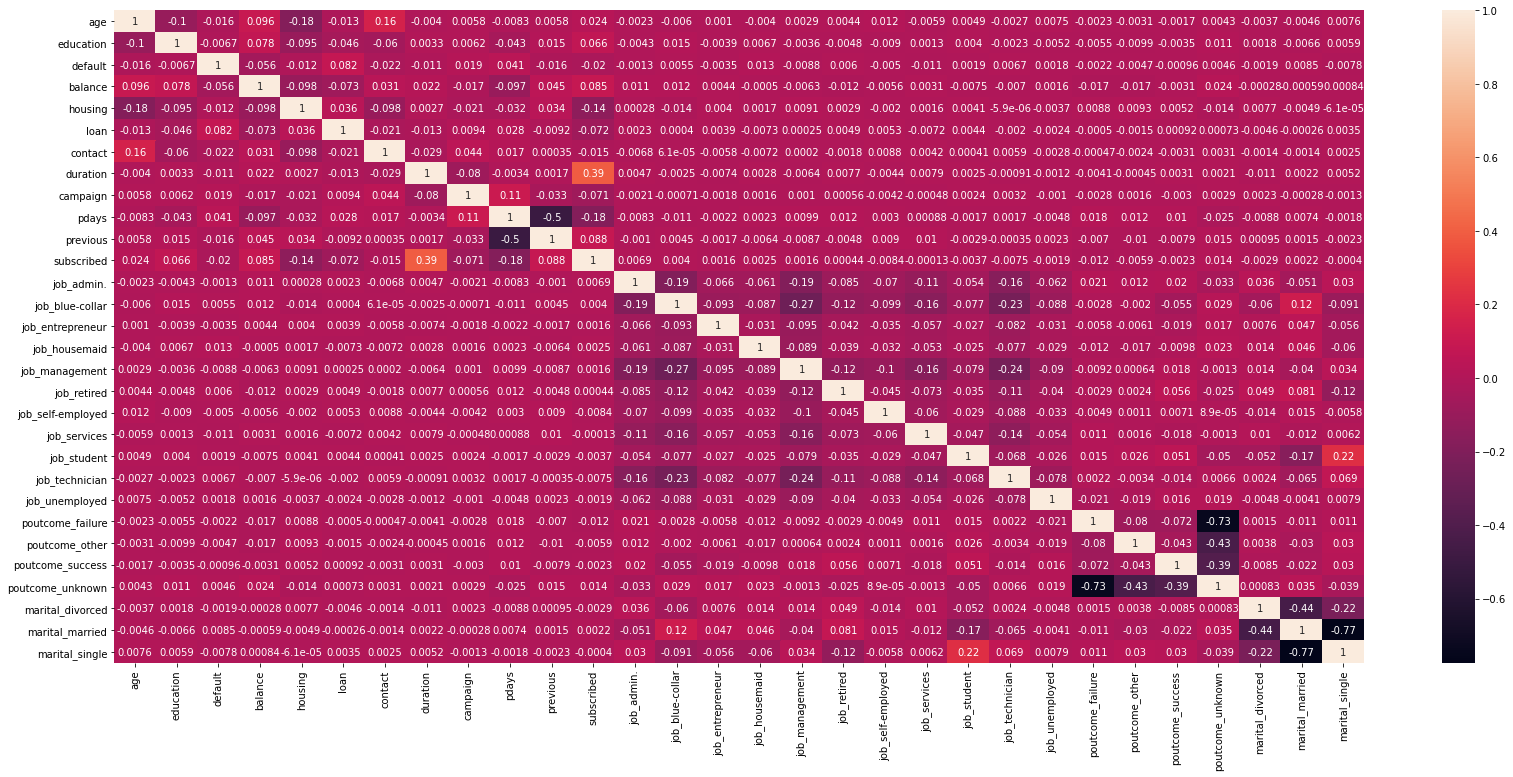

In [ ]:
plt.figure(figsize=(28, 12))
sns.heatmap(data_treino.corr(), annot = True)